In [9]:
import numpy as np #Importing packages
from numpy.linalg import matrix_power
from matplotlib import pyplot as plt 

In [136]:
#Variables and constants
N=3
p=4
e=np.e
pi=np.pi
K11, K12, K21, K22=1, 1, 1, 1
omega=e**(2*pi*1j/p)

In [137]:
#Important matrix methods

def cosine(angle):
    return np.cos(angle)
def id(p):
    return np.identity(p)
def id_chain(n, p):
    return np.identity(p**n)
print(id(1))

[[1.]]


In [138]:
def matrix_chain(n_identity_anterior, hamiltonian, n_identity_posterior):
    if n_identity_anterior!=0 and n_identity_posterior!=0:
        first_compute=np.tensordot(id_chain(n_identity_anterior, p), hamiltonian, axes=0) 
        return np.tensordot(first_compute, id_chain(n_identity_posterior, p), axes=0)
    elif n_identity_anterior==0:
        return np.tensordot(hamiltonian,id_chain(n_identity_posterior, p) , axes=0)
    else:
        return np.tensordot(id_chain(n_identity_anterior, p), hamiltonian , axes=0)
print(np.shape(matrix_chain(1, umaker(p), 1)))

(4, 4, 4, 4, 4, 4)


In [139]:
def umaker(p):
    matrix=np.zeros((p, p), dtype=complex)
    for i in range(p):
        matrix[i][i]=omega**i
    return matrix
    
def vmaker(p):
    matrix=id(p)
    for i in range(p):
        matrix[i]=(np.append(matrix[i][p-1], matrix[i][:p-1]))
    return matrix

In [140]:
def eigen_plot(l):
    for i in l:
        i=np.real(i)
    l=np.sort(l)
    plt.title("Eigenvalue Plot") 
    plt.xlabel("Number of eigenstates") 
    plt.ylabel("Eigenvalue") 
    plot=plt.plot(l, 'ob')
    return plot

In [141]:
def hamiltonian(n, p):
    matrix=np.zeros((p**n, p**n), dtype=complex)
    for site in range(n-1):
        localU=np.zeros((p**n, p**n), dtype=complex)
        for spin in range(p):
            m1=np.reshape(matrix_chain(site+1, umaker(p), n-site-2), (p**n, p**n))
            m2=np.reshape(matrix_chain(site, np.transpose(np.conjugate(umaker(p))), n-site-1), (p**n, p**n))
            Uchain=np.reshape(matrix_power(np.multiply(m1, m2), spin), (p**n, p**n))
            localU+=((K11+2*K12*cosine(2*pi*spin/p))*Uchain)
        matrix+=localU
    for site in range(n):
        localV=np.zeros((p**n, p**n), dtype=complex)
        for spin in range(p):
            Vchain=np.reshape(matrix_power((matrix_chain(site, vmaker(p), n-site-1)), spin), (p**n, p**n))
            localV+=((K21+2*K22)*Vchain)
        matrix+=localV
    return matrix
def hamiltonian_u(n, p):
    matrix=np.zeros((p**n, p**n), dtype=complex)
    for site in range(n-1):
        localU=np.zeros((p**n, p**n), dtype=complex)
        for spin in range(p):
            m1=np.reshape(matrix_chain(site+1, umaker(p), n-site-2), (p**n, p**n))
            m2=np.reshape(matrix_chain(site, np.transpose(np.conjugate(umaker(p))), n-site-1), (p**n, p**n))
            Uchain=np.reshape(matrix_power(np.multiply(m1, m2), spin), (p**n, p**n))
            localU+=((K11+2*K12*cosine(2*pi*spin/p))*Uchain)
        matrix+=localU
    return matrix
def hamiltonian_v(n, p):
    matrix=np.zeros((p**n, p**n), dtype=complex)
    for site in range(n):
        localV=np.zeros((p**n, p**n), dtype=complex)
        for spin in range(p):
            Vchain=np.reshape(matrix_power((matrix_chain(site, vmaker(p), n-site-1)), spin), (p**n, p**n))
            localV+=((K21+2*K22)*Vchain)
        matrix+=localV
    return matrix

In [144]:
matrix=hamiltonian_v(N, p)

/Users/mikezhang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


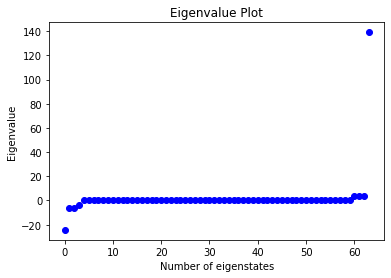

In [145]:
eigenvalues=np.linalg.eig(matrix)[0]
print(eigen_plot(eigenvalues))